# Predicting Soccer Injuries with Machine Learning
## EDA & Feature Engineering

Jennifer Lawless    
DASC 9311: Data Science Project    
September 20, 2025  

This notebook performs an exploratory data analysis (EDA) and feature engineering to prepare the dataset for injury-prediction modeling.

## Imports and Display Settings

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, chi2_contingency

In [3]:
# Suppress warnings and set display styles:
warnings.filterwarnings('ignore')

# Set display options:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Data Loading and Initial Exploration

In [4]:
# Load the dataset:
df = pd.read_csv('data.csv')

# Display the shape and first few rows of the dataset:
print(f"Dataset Shape: {df.shape}")
print("First 5 rows of the dataset:")
display(df.head())

Dataset Shape: (800, 19)
First 5 rows of the dataset:


,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


In [5]:
# Get some basic info about the dataset:
print("Dataset Info:")
display(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night

None

## Basic Exploratory Data Analysis (EDA)

In [6]:
# Get the dataset description:
print("Dataset Description:")
display(df.describe(include='all'))

Dataset Description:


,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
count,800.000000,800.000000,800.000000,800,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21.135000,177.407500,73.235000,NaN,9.951150,22.332500,1.536250,74.933249,79.154123,249.423244,83.832337,5.949025,78.341311,7.417124,54.039342,74.382174,0.597500,0.500000,23.377364
std,1.991037,7.148974,9.929276,NaN,2.610395,10.311516,1.292584,6.672704,6.782332,22.532387,6.931657,0.329133,8.775418,0.793183,11.421143,9.324899,0.490708,0.500313,3.673279
min,18.000000,154.000000,45.000000,NaN,5.000000,5.000000,0.000000,52.391351,58.180381,180.000000,60.059484,4.862435,50.000000,5.000000,21.561186,50.000000,0.000000,0.000000,14.346326
25%,19.000000,173.000000,66.000000,NaN,8.127151,13.000000,1.000000,70.432656,74.495959,234.089585,79.044910,5.732552,72.675392,6.850062,45.775371,67.809084,0.000000,0.000000,20.786644
50%,21.000000,177.000000,73.000000,NaN,9.895710,22.000000,1.000000,74.997933,79.187909,249.127328,84.156236,5.937692,78.340973,7.424618,54.047208,74.363878,1.000000,0.500000,23.130560
75%,23.000000,182.000000,80.000000,NaN,11.535140,32.000000,2.000000,79.632391,83.813179,265.105082,88.877902,6.159205,84.093489,7.988100,61.910804,80.502613,1.000000,1.000000,26.024182


In [7]:
# Check for missing values:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

No missing values found!


In [8]:
# Identify feature types:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
target_variable = 'Injury_Next_Season'

# Remove the target variable from the numerical features:
if target_variable in numerical_features:
    numerical_features.remove(target_variable)

# Display feature types:
print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")

Numerical Features (17): ['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week', 'Matches_Played_Past_Season', 'Previous_Injury_Count', 'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms', 'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score', 'Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Nutrition_Quality_Score', 'Warmup_Routine_Adherence', 'BMI']
Categorical Features (1): ['Position']


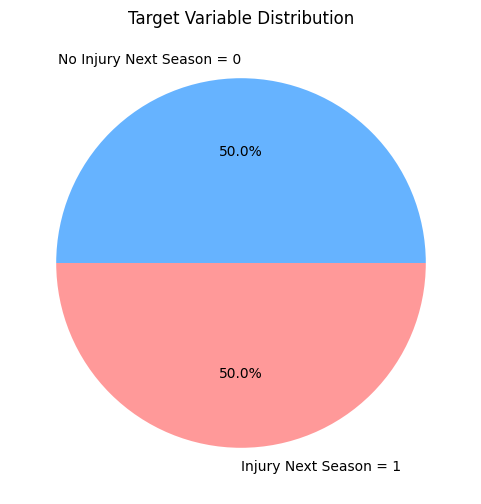

In [9]:
# Check balance of the target variable in a pie chart:
plt.figure(figsize=(6,6))
df[target_variable].value_counts().plot.pie(
	autopct='%1.1f%%',
	colors=['#66b3ff','#ff9999'],
	startangle=0,
	labels=['No Injury Next Season = 0', 'Injury Next Season = 1'],
)
plt.title('Target Variable Distribution')
plt.ylabel('')
plt.xlabel('')
plt.show()

## Feature Distribution Analysis

### Histograms of Numerical Features

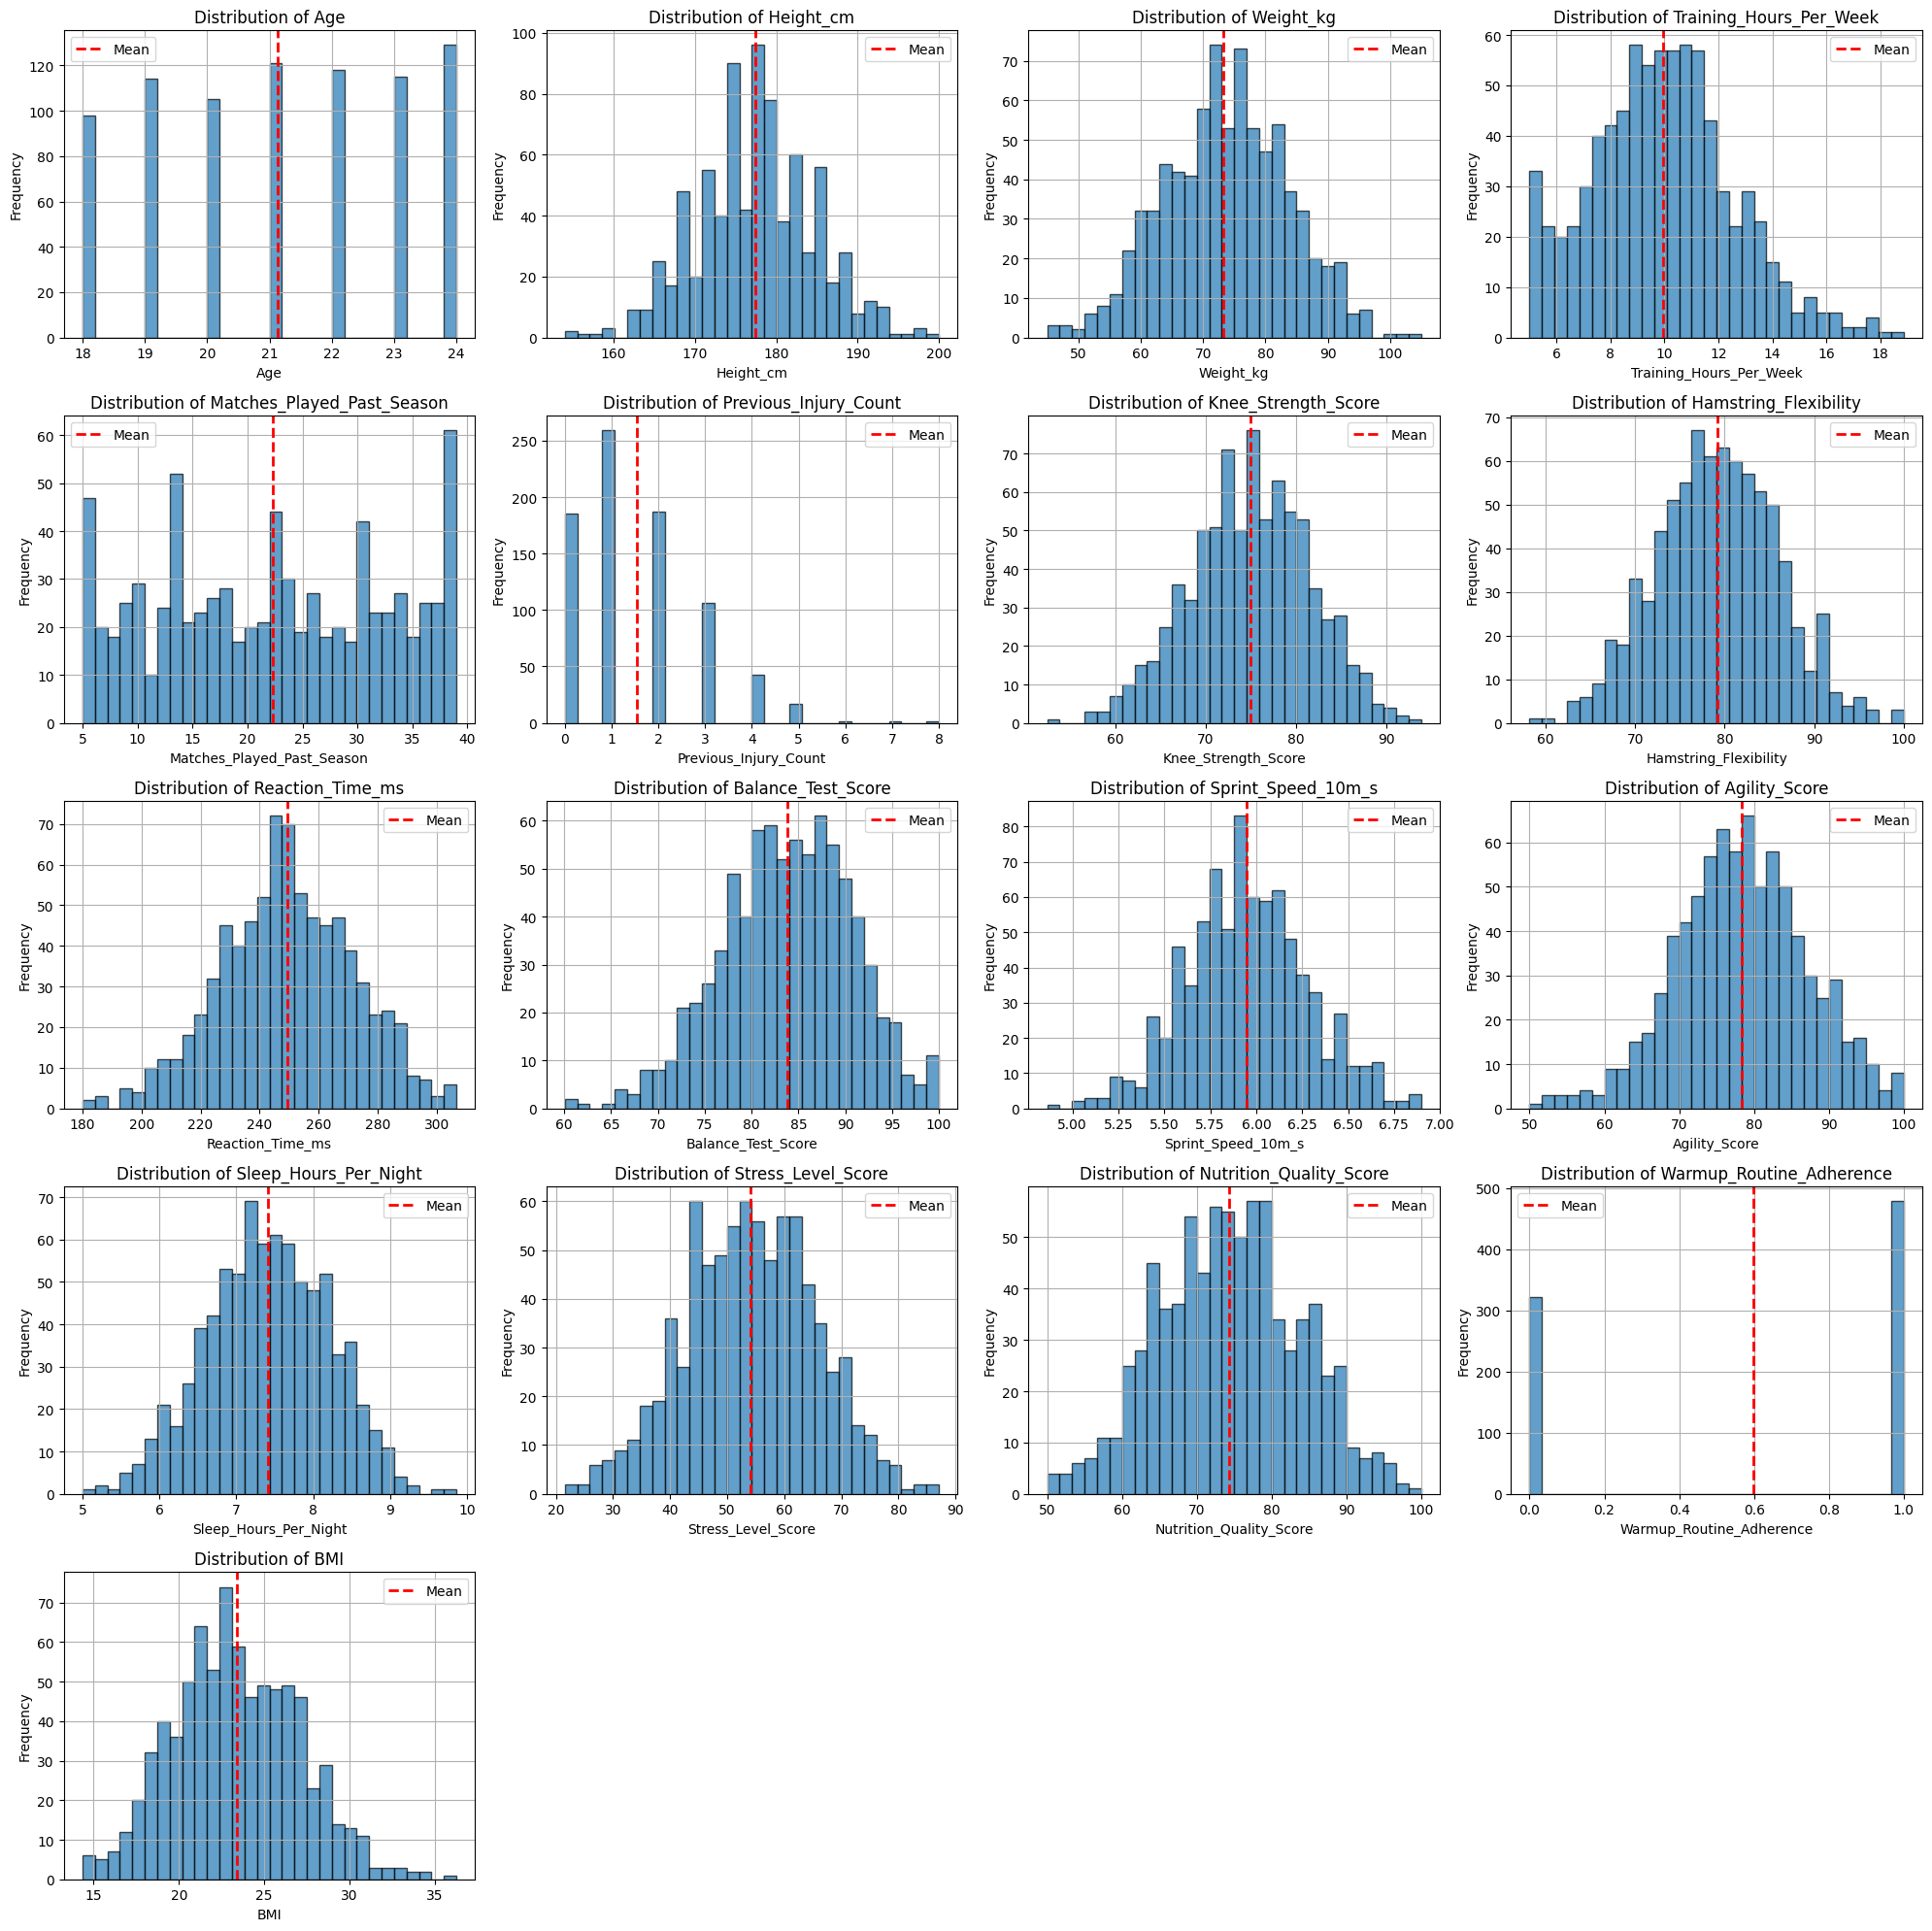

In [10]:
# Plot histograms for all numerical features:
n_features = len(numerical_features)
n_rows = int(np.ceil(n_features / 4))
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 4 * n_rows))
axes = axes.ravel()
for idx, feature in enumerate(numerical_features):
    df[feature].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    
    # Add vertical line for mean:
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[idx].legend()

# Hide extra subplot:
if n_features < len(axes):
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Bar Plots of Categorical Features

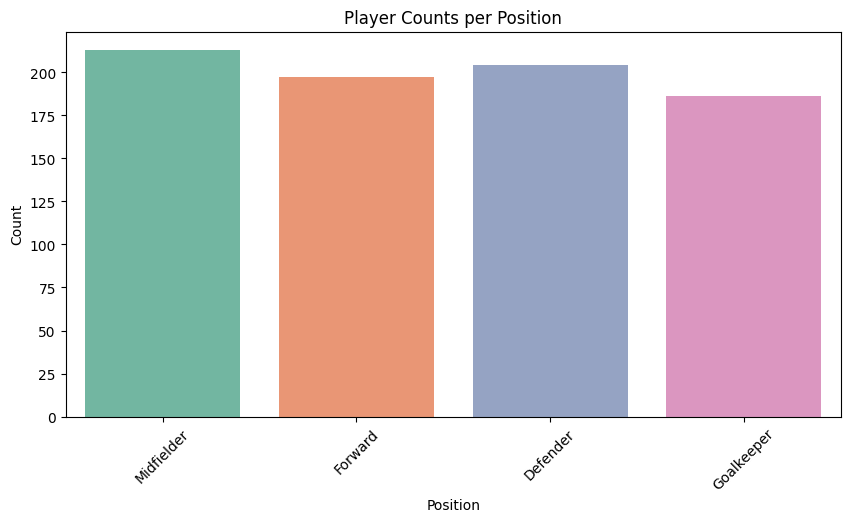

In [11]:
# Plot bar plots for categorical features to show counts:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Player Counts per {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Injury Pattern Analysis

### Statistical Test Function

In [12]:
# Create a function to automatically perform statistical tests depending on normality:
def auto_stat_test(df, features, target='Injury_Next_Season', alpha=0.05):

    # Loop through each feature and perform appropriate statistical test:
    for feature in features:

        # Separate the data into two groups based on the target variable:
        injured = df[df[target] == 1][feature].dropna()
        not_injured = df[df[target] == 0][feature].dropna()

        # Check normality:
        p_injured = shapiro(injured)[1]
        p_not_injured = shapiro(not_injured)[1]

        # Determine if both groups are normally distributed:
        normal_injured = p_injured > alpha
        normal_not_injured = p_not_injured > alpha

        # Output results:
        print(f"{feature}")
        print(f"   Normality p-values -> Injured: {p_injured:.4f}, Not Injured: {p_not_injured:.4f}")

        # Perform appropriate statistical test:
        if normal_injured and normal_not_injured:
            # Use t-test:
            stat, p_val = ttest_ind(injured, not_injured, nan_policy='omit')
            test_name = "t-test"
            direction = "higher" if stat > 0 else "lower"
        else:
            # Use Mann-Whitney U test:
            stat, p_val = mannwhitneyu(injured, not_injured, alternative='two-sided')
            test_name = "Mann-Whitney U"
            direction = "higher" if injured.median() > not_injured.median() else "lower"

        # Output test results:
        print(f"   {test_name} -> statistic={stat:.4f}, p-value={p_val:.4f}")
        if p_val < alpha:
            print(f"   Significant difference: Injured players have {direction} average {feature}.\n")
        else:
            print(f"   No significant difference in {feature} between groups.\n")

### Injury Patterns by Physical Characteristics (4 features)
Age, Height_cm, Weight_kg, BMI

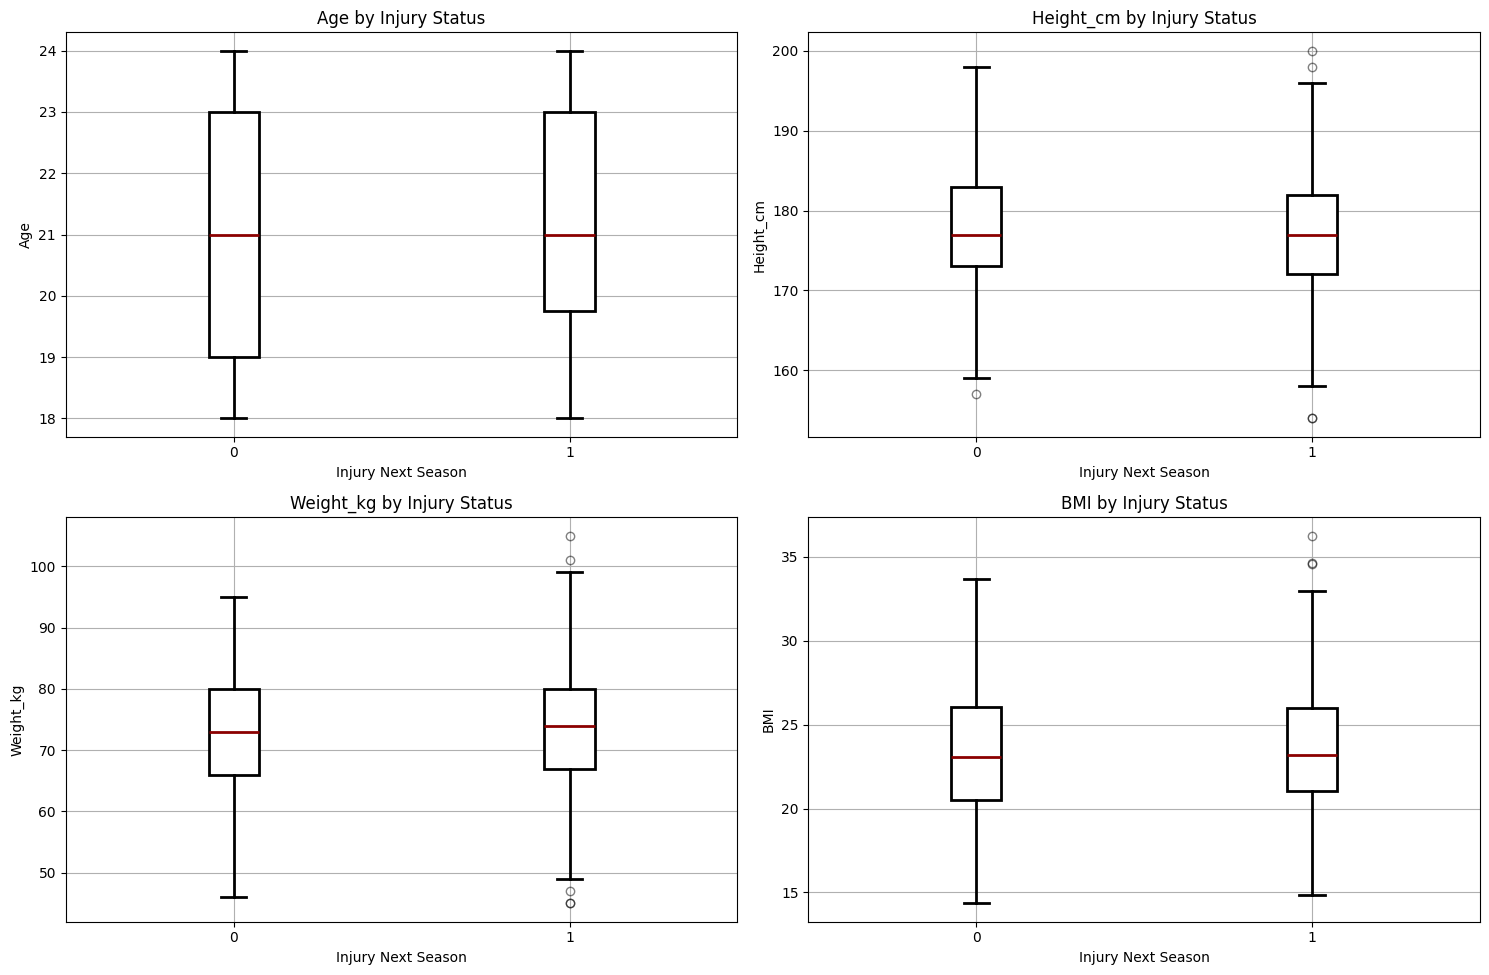

In [13]:
# Get the physical characteristics:
physical_features = ['Age', 'Height_cm', 'Weight_kg', 'BMI']

# Create boxplots for physical characteristics by injury status:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(physical_features):
    df.boxplot(
        column=feature, 
        by='Injury_Next_Season', 
        ax=axes[idx],
        patch_artist=True,
        boxprops=dict(color='black', linewidth=2, facecolor='white'),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='darkred', linewidth=2),
        flierprops=dict(marker='o', color='black', alpha=0.5)
    )
    axes[idx].set_title(f'{feature} by Injury Status')
    axes[idx].set_xlabel('Injury Next Season')
    axes[idx].set_ylabel(feature)
    axes[idx].figure.suptitle('')

plt.tight_layout()
plt.show()

In [14]:
# Perform statistical tests for physical characteristics:
auto_stat_test(df, physical_features, target='Injury_Next_Season', alpha=0.05)

Age
   Normality p-values -> Injured: 0.0000, Not Injured: 0.0000
   Mann-Whitney U -> statistic=81899.0000, p-value=0.5572
   No significant difference in Age between groups.

Height_cm
   Normality p-values -> Injured: 0.6244, Not Injured: 0.2466
   t-test -> statistic=-1.5543, p-value=0.1205
   No significant difference in Height_cm between groups.

Weight_kg
   Normality p-values -> Injured: 0.7939, Not Injured: 0.0437
   Mann-Whitney U -> statistic=81523.5000, p-value=0.6410
   No significant difference in Weight_kg between groups.

BMI
   Normality p-values -> Injured: 0.0267, Not Injured: 0.2126
   Mann-Whitney U -> statistic=83359.5000, p-value=0.3040
   No significant difference in BMI between groups.



### Injury Patterns by Soccer-Specific Metrics (4 features)
Position, Training_Hours_Per_Week, Matches_Played_Past_Season, Previous_Injury_Count

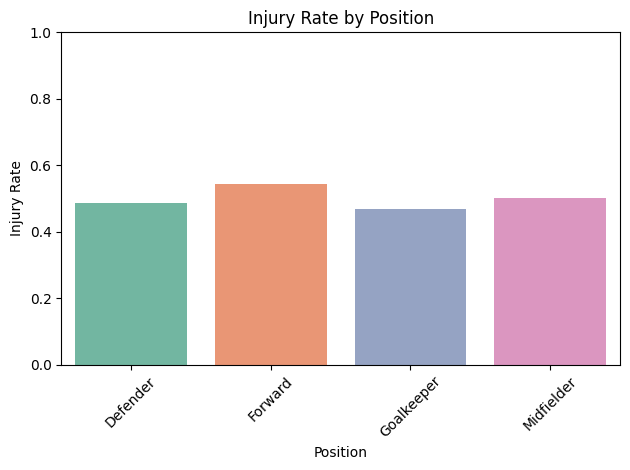

In [15]:
# Calculate injury rate per position:
injury_by_position = df.groupby('Position')['Injury_Next_Season'].mean().reset_index()

# Plot the injury rates by position:
sns.barplot(data=injury_by_position, x='Position', y='Injury_Next_Season', palette='Set2')
plt.title('Injury Rate by Position')
plt.xlabel('Position')
plt.ylabel('Injury Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Create contingency table:
contingency = pd.crosstab(df['Position'], df['Injury_Next_Season'])

# Run chi-square test:
chi2, p, dof, expected = chi2_contingency(contingency)

# Output results:
print("Position")
print(f"   Chi-square statistic = {chi2:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("   Significant association between Position and Injury Status.")
else:
    print("   No significant association between Position and Injury Status.")

Position
   Chi-square statistic = 2.4224, p-value = 0.4895
   No significant association between Position and Injury Status.


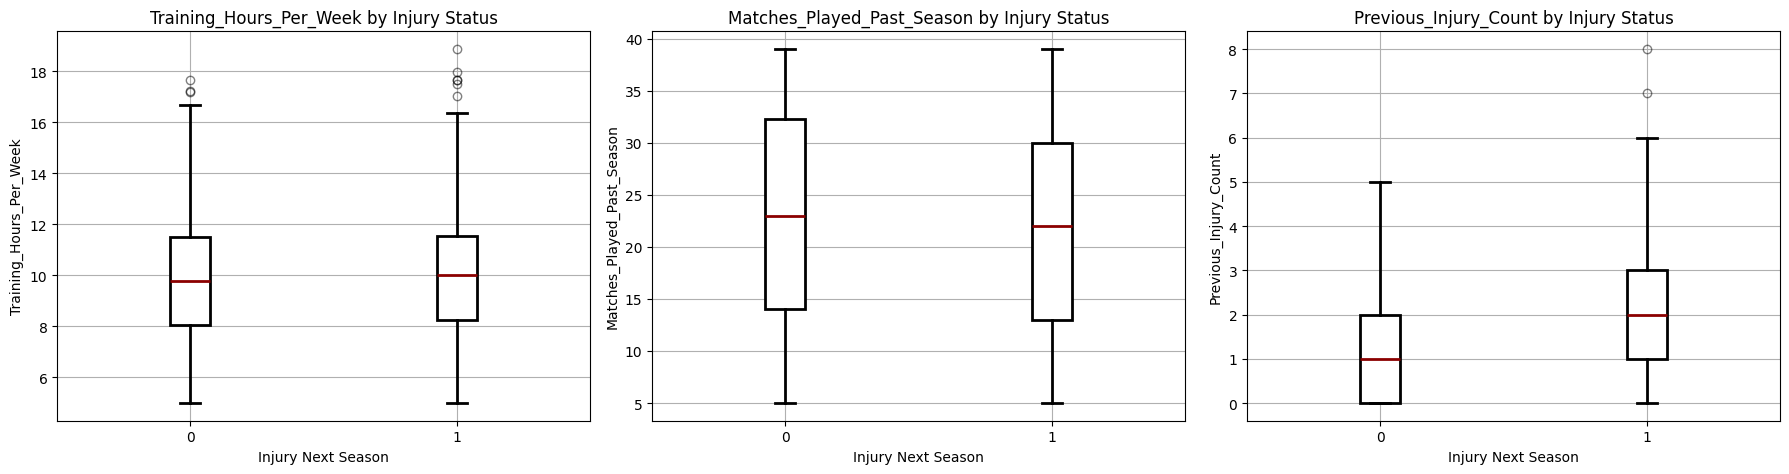

In [17]:
# Get the soccer-related features:
soccer_features = ['Training_Hours_Per_Week', 'Matches_Played_Past_Season', 'Previous_Injury_Count']

# Create boxplots for soccer-related features by injury status:
fig, axes = plt.subplots(1, len(soccer_features), figsize=(6 * len(soccer_features), 5))
for idx, feature in enumerate(soccer_features):
    df.boxplot(
        column=feature,
        by='Injury_Next_Season',
        ax=axes[idx],
        patch_artist=True,
        boxprops=dict(color='black', linewidth=2, facecolor='white'),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='darkred', linewidth=2),
        flierprops=dict(marker='o', color='black', alpha=0.5)
    )
    axes[idx].set_title(f'{feature} by Injury Status')
    axes[idx].set_xlabel('Injury Next Season')
    axes[idx].set_ylabel(feature)

fig.suptitle('')
plt.tight_layout()
plt.show()

In [18]:
# Perform statistical tests for soccer-related features:
auto_stat_test(df, soccer_features, target='Injury_Next_Season', alpha=0.05)

Training_Hours_Per_Week
   Normality p-values -> Injured: 0.0006, Not Injured: 0.0035
   Mann-Whitney U -> statistic=82629.5000, p-value=0.4211
   No significant difference in Training_Hours_Per_Week between groups.

Matches_Played_Past_Season
   Normality p-values -> Injured: 0.0000, Not Injured: 0.0000
   Mann-Whitney U -> statistic=75864.5000, p-value=0.2056
   No significant difference in Matches_Played_Past_Season between groups.

Previous_Injury_Count
   Normality p-values -> Injured: 0.0000, Not Injured: 0.0000
   Mann-Whitney U -> statistic=114072.5000, p-value=0.0000
   Significant difference: Injured players have higher average Previous_Injury_Count.



### Injury Patterns by Physical Fitness Assessment (6 features)
Knee_Strength_Score, Hamstring_Flexibility, Reaction_Time_ms, Balance_Test_Score, Sprint_Speed_10m_s, Agility_Score

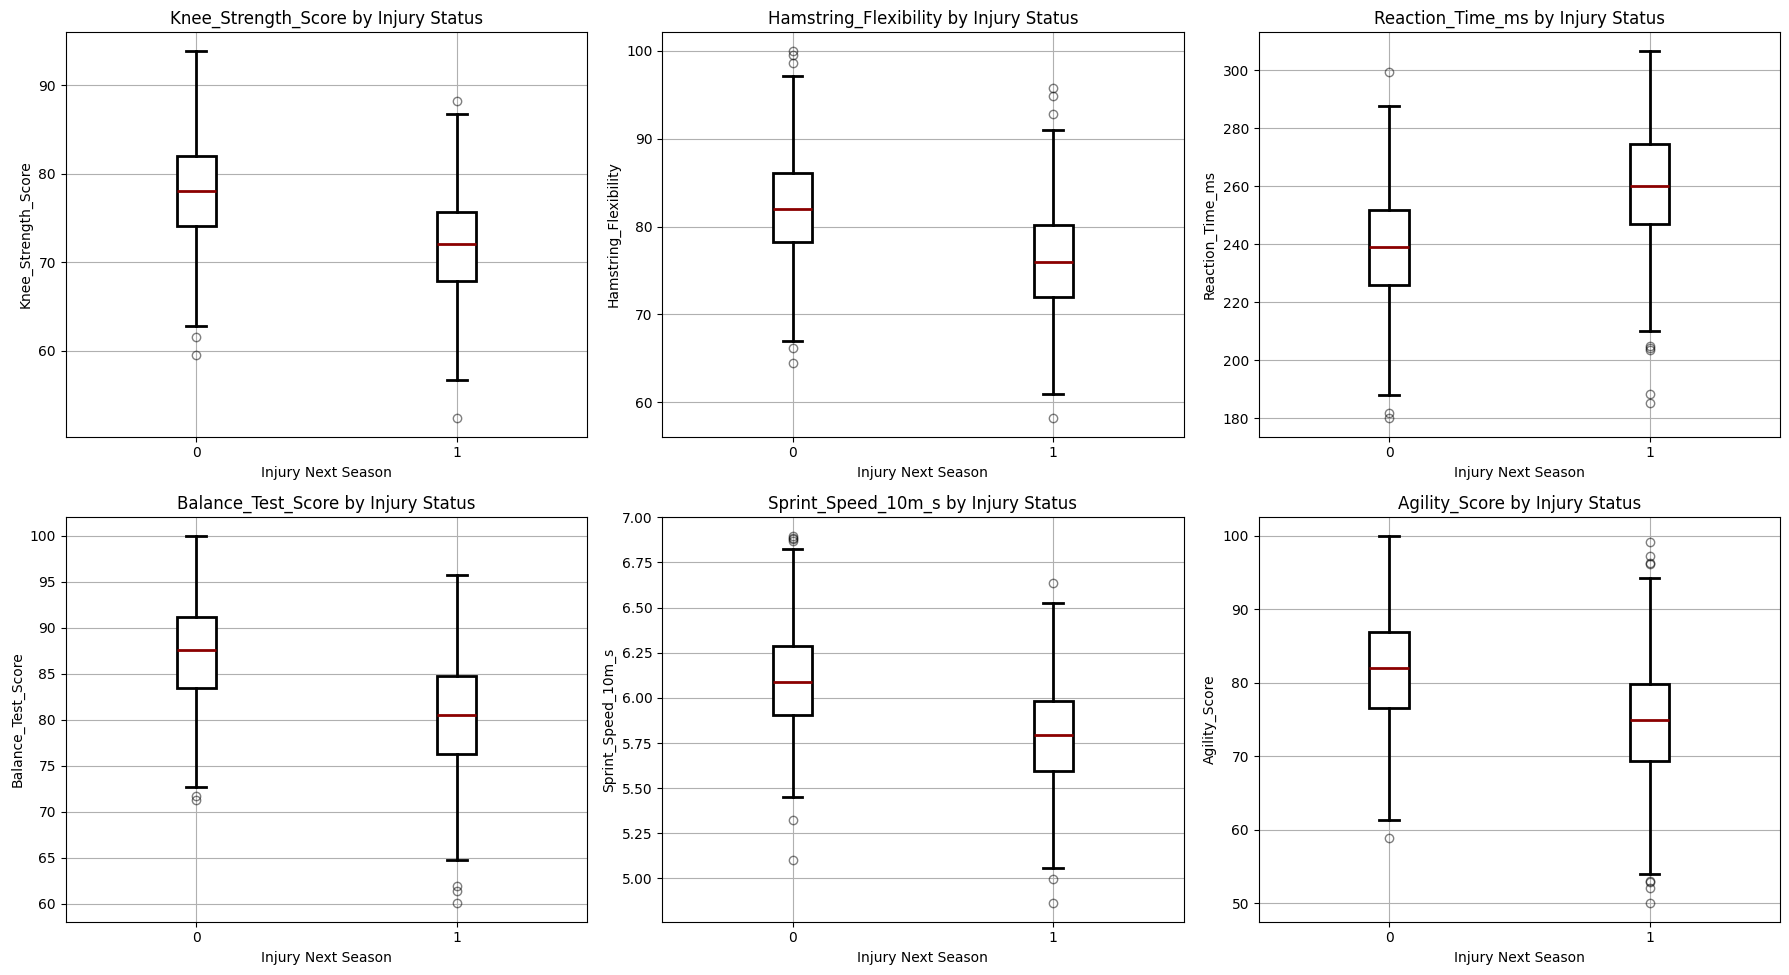

In [19]:
# Get the fitness test features:
fitness_features = ['Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms',
                    'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score']

# Create boxplots for fitness test features by injury status:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
for idx, feature in enumerate(fitness_features):
    df.boxplot(
        column=feature,
        by='Injury_Next_Season',
        ax=axes[idx],
        patch_artist=True,
        boxprops=dict(color='black', linewidth=2, facecolor='white'),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='darkred', linewidth=2),
        flierprops=dict(marker='o', color='black', alpha=0.5)
    )
    axes[idx].set_title(f'{feature} by Injury Status')
    axes[idx].set_xlabel('Injury Next Season')
    axes[idx].set_ylabel(feature)

fig.suptitle('')
plt.tight_layout()
plt.show()

In [20]:
# Perform statistical tests for fitness test features:
auto_stat_test(df, fitness_features, target='Injury_Next_Season', alpha=0.05)

Knee_Strength_Score
   Normality p-values -> Injured: 0.8930, Not Injured: 0.3687
   t-test -> statistic=-14.4159, p-value=0.0000
   Significant difference: Injured players have lower average Knee_Strength_Score.

Hamstring_Flexibility
   Normality p-values -> Injured: 0.6972, Not Injured: 0.8268
   t-test -> statistic=-14.2473, p-value=0.0000
   Significant difference: Injured players have lower average Hamstring_Flexibility.

Reaction_Time_ms
   Normality p-values -> Injured: 0.0125, Not Injured: 0.9882
   Mann-Whitney U -> statistic=124499.0000, p-value=0.0000
   Significant difference: Injured players have higher average Reaction_Time_ms.

Balance_Test_Score
   Normality p-values -> Injured: 0.3645, Not Injured: 0.1501
   t-test -> statistic=-16.0851, p-value=0.0000
   Significant difference: Injured players have lower average Balance_Test_Score.

Sprint_Speed_10m_s
   Normality p-values -> Injured: 0.9539, Not Injured: 0.2262
   t-test -> statistic=-15.1036, p-value=0.0000
   Sign

### Injury Patterns by Lifestyle Factors (3 features)
Sleep_Hours_Per_Night, Stress_Level_Score, Nutrition_Quality_Score

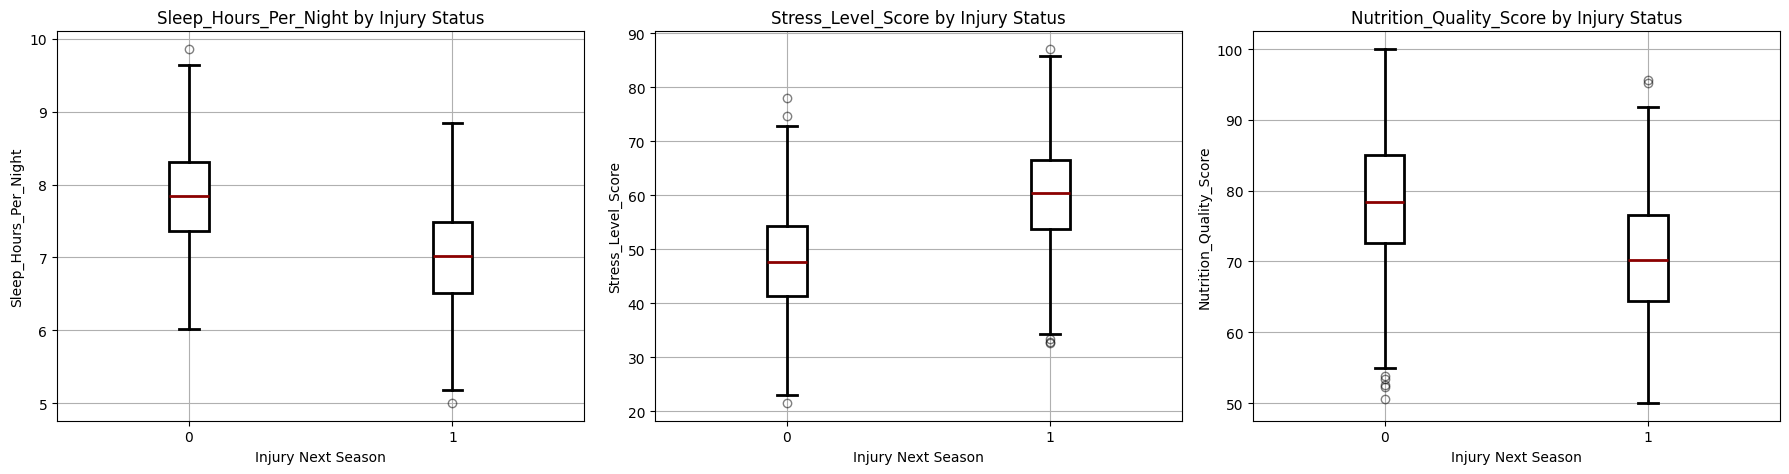

In [21]:
# Get the lifestyle features:
lifestyle_features = ['Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Nutrition_Quality_Score']

# Create boxplots for lifestyle features by injury status:
fig, axes = plt.subplots(1, len(lifestyle_features), figsize=(6 * len(lifestyle_features), 5))
for idx, feature in enumerate(lifestyle_features):
    df.boxplot(
        column=feature,
        by='Injury_Next_Season',
        ax=axes[idx],
        patch_artist=True,
        boxprops=dict(color='black', linewidth=2, facecolor='white'),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='darkred', linewidth=2),
        flierprops=dict(marker='o', color='black', alpha=0.5)
    )
    axes[idx].set_title(f'{feature} by Injury Status')
    axes[idx].set_xlabel('Injury Next Season')
    axes[idx].set_ylabel(feature)

fig.suptitle('')
plt.tight_layout()
plt.show()

In [22]:
# Perform statistical tests for lifestyle features:
auto_stat_test(df, lifestyle_features, target='Injury_Next_Season', alpha=0.05)

Sleep_Hours_Per_Night
   Normality p-values -> Injured: 0.8582, Not Injured: 0.5578
   t-test -> statistic=-16.7875, p-value=0.0000
   Significant difference: Injured players have lower average Sleep_Hours_Per_Night.

Stress_Level_Score
   Normality p-values -> Injured: 0.6305, Not Injured: 0.8400
   t-test -> statistic=17.6538, p-value=0.0000
   Significant difference: Injured players have higher average Stress_Level_Score.

Nutrition_Quality_Score
   Normality p-values -> Injured: 0.1402, Not Injured: 0.0184
   Mann-Whitney U -> statistic=40976.0000, p-value=0.0000
   Significant difference: Injured players have lower average Nutrition_Quality_Score.



### Injury Patterns by Training Compliance (1 feature)
Warmup_Routine_Adherence (0=Poor, 1=Good)

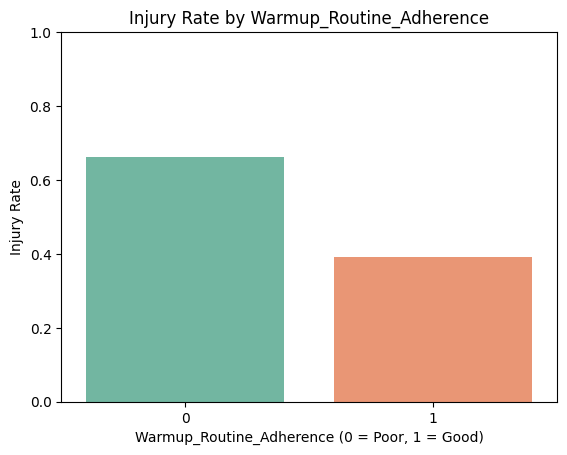

In [23]:
# Get the compliance feature:
compliance_feature = 'Warmup_Routine_Adherence'

# Create a bar plot of injury rate by compliance:
injury_rate = df.groupby(compliance_feature)['Injury_Next_Season'].mean().reset_index()
sns.barplot(data=injury_rate, x=compliance_feature, y='Injury_Next_Season', palette='Set2')
plt.title('Injury Rate by Warmup_Routine_Adherence')
plt.xlabel('Warmup_Routine_Adherence (0 = Poor, 1 = Good)')
plt.ylabel('Injury Rate')
plt.ylim(0, 1)
plt.show()

In [24]:
# Create contingency table:
contingency = pd.crosstab(df['Warmup_Routine_Adherence'], df['Injury_Next_Season'])

# Run chi-square test:
chi2, p, dof, expected = chi2_contingency(contingency)

# Output results:
print("Warmup_Routine_Adherence")
print(f"   Chi-square statistic = {chi2:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("   Significant association between Warmup_Routine_Adherence and Injury Status.")
else:
    print("   No significant association between Warmup_Routine_Adherence and Injury Status.")

Warmup_Routine_Adherence
   Chi-square statistic = 55.1418, p-value = 0.0000
   Significant association between Warmup_Routine_Adherence and Injury Status.


### Summary of Injury Pattern Analysis

#### Physical Characteristics
**No significant differences** were found between injured and non-injured players for:
  - Age
  - Height
  - Weight
  - BMI

**Key Insight**: These features do not appear to be strong predictors of injury risk in this dataset.

#### Soccer-Specific Metrics
**Previous Injury Count** showed a **significant difference**:
  - Injured players had **higher average previous injuries** (p < 0.001).

**Training Hours** and **Matches Played** showed **no significant differences**.

**Position** had **no significant association** with injury status.

**Key Insight**: Injury history is a strong indicator of future injury risk.

#### Physical Fitness Assessments
All six fitness metrics showed **statistically significant differences** between groups:

| Feature                  | Injured Players Showed |
|--------------------------|------------------------|
| Knee Strength Score      | Lower scores           |
| Hamstring Flexibility    | Lower scores           |
| Reaction Time (ms)       | Slower reactions       |
| Balance Test Score       | Lower scores           |
| Sprint Speed (10m/s)     | Slower speeds          |
| Agility Score            | Lower scores           |

**Key Insight**: Poor physical fitness performance is strongly associated with increased injury risk.

#### Lifestyle Factors
All three lifestyle metrics showed **significant differences**:

| Feature                  | Injured Players Showed |
|--------------------------|------------------------|
| Sleep Hours              | Fewer hours            |
| Stress Level Score       | Higher stress          |
| Nutrition Quality Score  | Lower quality          |

**Key Insight**: Lifestyle habits play a critical role in determining injury risk.

#### Training Compliance
**Warmup Routine Adherence** showed a **strong association** with injury status (p < 0.001).

Players with **poor adherence** were significantly more likely to be injured.

**Key Insight**: Complying to training could reduce injury risk.

#### Important Notes
**Most predictive features**: Previous Injury Count, Physical Fitness Scores, Lifestyle Factors, and Warmup Routine Adherence.

**Least predictive features**: Age, Height, Weight, BMI, Position, Training Load.

## Correlation Analysis

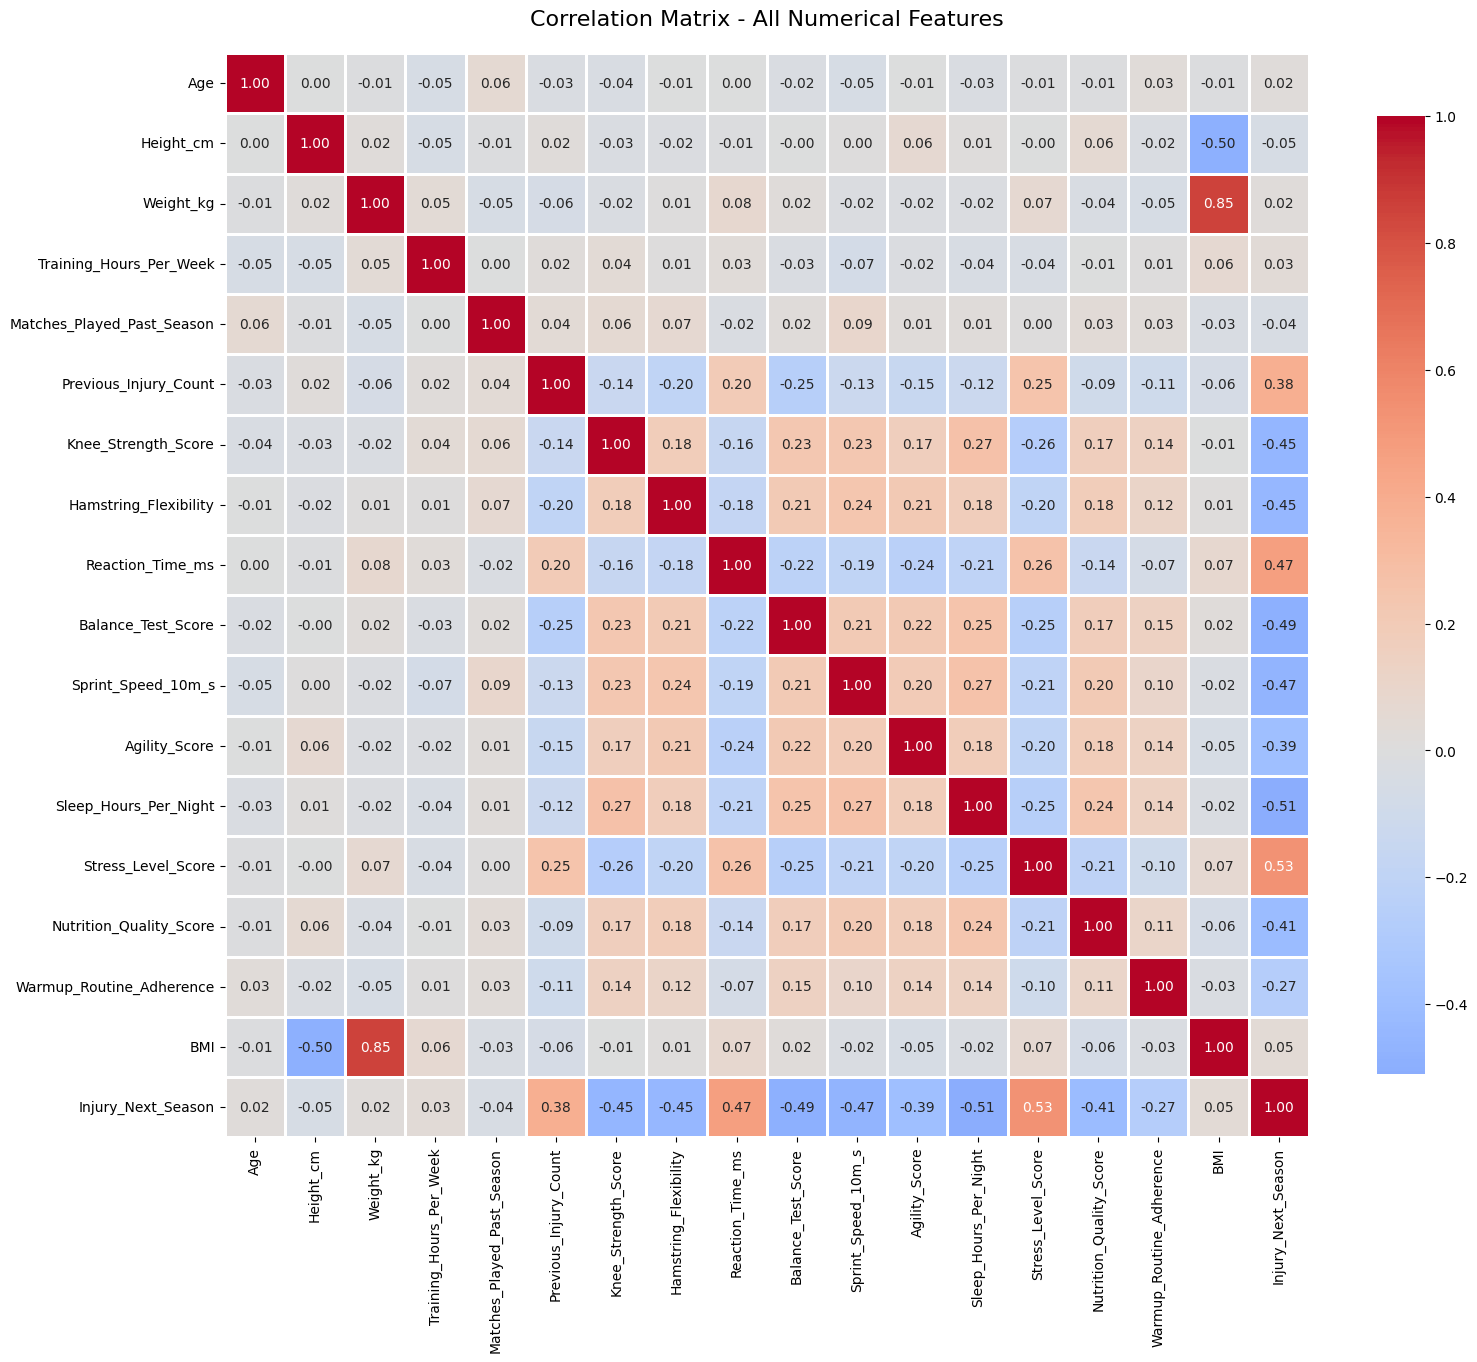

In [25]:
# Calculate correlation matrix for numerical features:
corr_matrix = df[numerical_features + [target_variable]].corr()

# Create heatmap:
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [26]:
# Output highly correlated pairs:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7 and corr_matrix.columns[i] != target_variable and corr_matrix.columns[j] != target_variable:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.7):")
    for pair in high_corr_pairs:
        print(f"   {pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated feature pairs (|correlation| > 0.7):
   BMI and Weight_kg: correlation = 0.85


In [27]:
# Focus on correlation with target variable:
injury_corr = corr_matrix['Injury_Next_Season'].sort_values(ascending=False)
print("\nCorrelation with Injury_Next_Season:")
display(injury_corr)


Correlation with Injury_Next_Season:


Injury_Next_Season            1.000000
Stress_Level_Score            0.529961
Reaction_Time_ms              0.470878
Previous_Injury_Count         0.382226
BMI                           0.047380
Training_Hours_Per_Week       0.033793
Age                           0.021359
Weight_kg                     0.021163
Matches_Played_Past_Season   -0.043910
Height_cm                    -0.054937
Warmup_Routine_Adherence     -0.265089
Agility_Score                -0.393681
Nutrition_Quality_Score      -0.412496
Hamstring_Flexibility        -0.450317
Knee_Strength_Score          -0.454551
Sprint_Speed_10m_s           -0.471499
Balance_Test_Score           -0.494814
Sleep_Hours_Per_Night        -0.510869
Name: Injury_Next_Season, dtype: float64

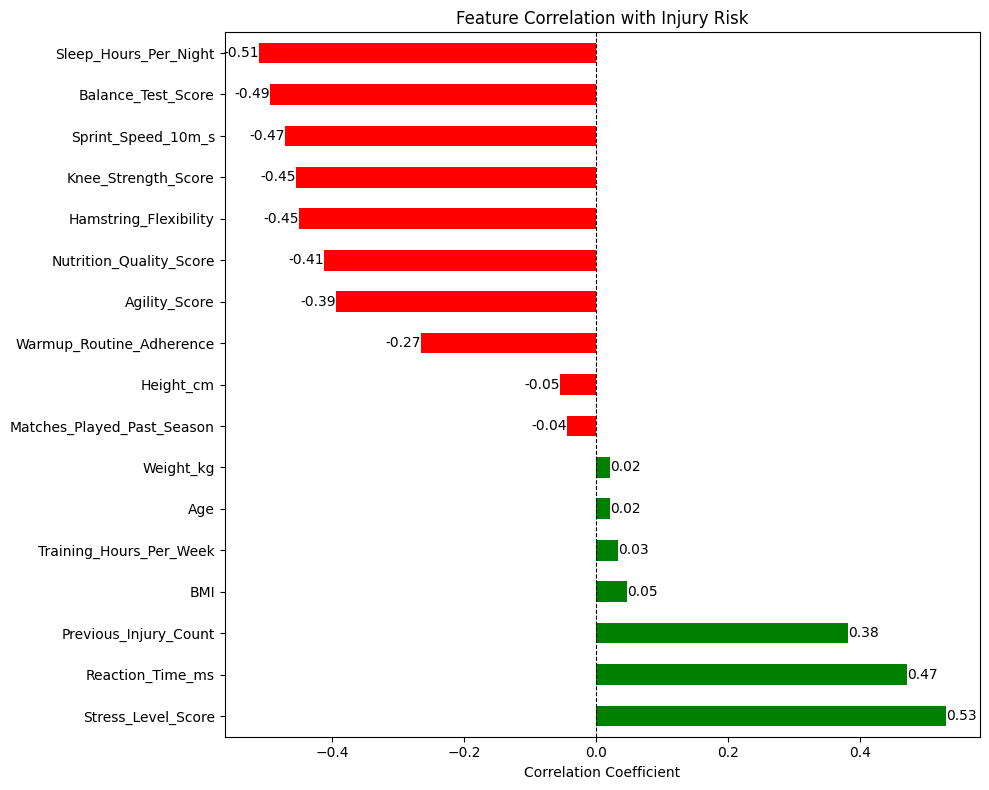

In [28]:
# Visualize top correlations with injury risk:
plt.figure(figsize=(10, 8))
injury_corr_plot = injury_corr[injury_corr.index != 'Injury_Next_Season']
colors = ['red' if x < 0 else 'green' for x in injury_corr_plot.values]
injury_corr_plot.plot(kind='barh', color=colors)
for index, value in enumerate(injury_corr_plot.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left' if value > 0 else 'right', fontsize=10)
plt.title('Feature Correlation with Injury Risk')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

### Summary of Correlation Analysis

#### Highly Correlated Feature Pairs
**BMI and Weight_kg**: correlation = **0.85** 
  - This strong positive correlation indicates redundancy. These features may carry overlapping information and should be considered carefully during feature selection to avoid multicollinearity.

#### Correlation with Injury_Next_Season

##### Positively Correlated Features (higher values associated with increased injury risk):
| Feature                | Correlation |
|------------------------|-------------|
| Stress_Level_Score     | **0.53**    |
| Reaction_Time_ms       | **0.47**    |
| Previous_Injury_Count  | **0.38**    |
| BMI                    | 0.05        |
| Training_Hours_Per_Week| 0.03        |
| Age                    | 0.02        |
| Weight_kg              | 0.02        |

##### Negatively Correlated Features (higher values associated with reduced injury risk):
| Feature                    | Correlation |
|----------------------------|-------------|
| Sleep_Hours_Per_Night      | **-0.51**   |
| Balance_Test_Score         | **-0.49**   |
| Sprint_Speed_10m_s         | **-0.47**   |
| Knee_Strength_Score        | **-0.45**   |
| Hamstring_Flexibility      | **-0.45**   |
| Nutrition_Quality_Score    | **-0.41**   |
| Agility_Score              | **-0.39**   |
| Warmup_Routine_Adherence   | **-0.27**   |
| Height_cm                  | -0.05       |
| Matches_Played_Past_Season | -0.04       |

#### Key Insights
**Strongest risk indicators**:
  - High stress levels
  - Slower reaction times
  - History of previous injuries

**Strongest protective factors**:
  - More sleep
  - Better balance, speed, strength, flexibility, and agility
  - Higher nutrition quality
  - Good warmup routine adherence

**Low correlation features**:
  - Age, height, weight, BMI, and match/training load show weak correlations with injury risk.

## Feature Engineering

In [29]:
# Create a copy of the original df:
df_engineered = df.copy()

# 1. Age Group Binning:
df_engineered['Age_Group'] = pd.cut(
    df_engineered['Age'],
    bins=[17, 20, 22, 25],
    labels=['U20', 'U22', 'U25']
)

# 2. BMI Category Binning:
df_engineered['BMI_Category'] = pd.cut(
    df_engineered['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# 3. Training Intensity Score:
df_engineered['Training_Intensity'] = (
    df_engineered['Training_Hours_Per_Week'] *
    df_engineered['Matches_Played_Past_Season']
) / 10

# 4. Fitness Composite Score:
df_engineered['Fitness_Score'] = (
    df_engineered['Knee_Strength_Score'] +
    df_engineered['Hamstring_Flexibility'] +
    df_engineered['Balance_Test_Score'] +
    df_engineered['Agility_Score']
) / 4

# 5. Wellness Score (Sleep, Stress, Nutrition):
df_engineered['Wellness_Score'] = (
    df_engineered['Sleep_Hours_Per_Night'] * 10 +
    (100 - df_engineered['Stress_Level_Score']) +
    df_engineered['Nutrition_Quality_Score']
) / 3

# 6. Risk Flag: High Injury History + High Match Load:
df_engineered['High_Risk'] = (
    (df_engineered['Previous_Injury_Count'] >= 2) &
    (df_engineered['Matches_Played_Past_Season'] > 30)
).astype(int)

# 7. Interaction Features:
df_engineered['Age_x_Training'] = (
    df_engineered['Age'] * df_engineered['Training_Hours_Per_Week']
)
df_engineered['Workload_Recovery_Ratio'] = (
    df_engineered['Matches_Played_Past_Season'] /
    (df_engineered['Sleep_Hours_Per_Night'] + 1e-3)     # avoids division by zero
)

# 8. Stress-to-Sleep Ratio:
df_engineered['Stress_Sleep_Ratio'] = (
    df_engineered['Stress_Level_Score'] /
    (df_engineered['Sleep_Hours_Per_Night'] + 1e-3)
)

# 9. Low Fitness Flag
df_engineered['Low_Fitness'] = (
    df_engineered['Fitness_Score'] < df_engineered['Fitness_Score'].quantile(0.25)
).astype(int)

# Sort the columns alphabetically with target variable at the front:
cols = df_engineered.columns.tolist()
cols.remove('Injury_Next_Season')
cols = ['Injury_Next_Season'] + sorted(cols)
df_engineered = df_engineered[cols]

# Preview engineered features:
new_features = [
    'Age_Group', 'BMI_Category', 'Training_Intensity', 'Fitness_Score',
    'Wellness_Score', 'High_Risk', 'Age_x_Training', 'Workload_Recovery_Ratio',
    'Stress_Sleep_Ratio', 'Low_Fitness'
]
print("New engineered features:")
display(df_engineered[new_features].head())

New engineered features:


,Age_Group,BMI_Category,Training_Intensity,Fitness_Score,Wellness_Score,High_Risk,Age_x_Training,Workload_Recovery_Ratio,Stress_Sleep_Ratio,Low_Fitness
0,U22,Normal,41.671109,81.347050,72.412907,0,254.656777,4.369307,5.657817,0
1,U20,Normal,45.420717,84.222299,73.842004,1,220.965650,4.118095,5.494656,0
2,U22,Normal,14.705875,76.656996,64.678858,0,269.607705,1.659707,5.965651,0
3,U20,Normal,9.907345,81.938568,71.702168,0,180.133551,1.431913,6.707672,0
4,U20,Obese,12.683668,80.897080,62.156795,0,228.306016,1.486085,7.784071,0


In [30]:
# Print the statistics of the engineered features:
print("Engineered features statistics:")
display(df_engineered[new_features[2:]].describe())

Engineered features statistics:


,Training_Intensity,Fitness_Score,Wellness_Score,High_Risk,Age_x_Training,Workload_Recovery_Ratio,Stress_Sleep_Ratio,Low_Fitness
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,22.227511,79.065255,64.838025,0.135000,210.068853,3.043512,7.414888,0.250000
std,11.996232,4.640730,6.719935,0.341937,57.445999,1.435828,1.955836,0.433284
min,2.925171,65.257761,47.541045,0.000000,90.000000,0.550806,2.683437,0.000000
25%,12.564022,75.542365,59.678335,0.000000,170.313995,1.804215,5.893362,0.000000
50%,20.474581,79.207870,64.746861,0.000000,208.630388,3.044474,7.229864,0.000000
75%,30.381447,82.606790,69.964419,0.000000,246.329028,4.194689,8.772029,0.250000
max,62.985281,89.573210,82.846186,1.000000,396.198777,6.522908,13.549845,1.000000


## Data Preprocessing

### Outlier Detection

In [31]:
# Get the updated feature lists:
numerical_features = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_engineered.select_dtypes(include=['object', 'category']).columns.tolist()
if target_variable in numerical_features:
    numerical_features.remove(target_variable)

# Remove the binary numerical features from numerical_features:
binary_numerical = ['High_Risk', 'Low_Fitness', 'Warmup_Routine_Adherence']
numerical_features = [feat for feat in numerical_features if feat not in binary_numerical]

# Create function to detect outliers using IQR method:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and summarize outliers for each numerical feature:
outlier_summary = []
for feature in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df_engineered, feature)
    outlier_summary.append({
        'Feature': feature,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': len(outliers) / len(df_engineered) * 100,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

                   Feature  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
                       Age              0               0.000    13.000000    29.000000
            Age_x_Training              8               1.000    56.291446   360.351578
             Agility_Score              7               0.875    55.548246   101.220635
                       BMI              3               0.375    12.930337    33.880490
        Balance_Test_Score              3               0.375    64.295422   103.627390
             Fitness_Score              0               0.000    64.945728    93.203428
     Hamstring_Flexibility              4               0.500    60.520130    97.789008
                 Height_cm             11               1.375   159.500000   195.500000
       Knee_Strength_Score              2               0.250    56.633054    93.431993
Matches_Played_Past_Season              0               0.000   -15.500000    60.500000
   Nutrition_Quality_Score      

In [32]:
# Apply IQR capping to each numerical feature (excluding binary flags):
for feature in numerical_features:
    _, lower, upper = detect_outliers_iqr(df_engineered, feature)
    df_engineered[feature] = df_engineered[feature].clip(lower, upper)

print("Outliers capped using IQR bounds. Dataset preserved.")

Outliers capped using IQR bounds. Dataset preserved.


### Data Scaling

In [33]:
# Get the updated feature lists:
numerical_features = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_engineered.select_dtypes(include=['object', 'category']).columns.tolist()
if target_variable in numerical_features:
    numerical_features.remove(target_variable)
    
# Remove the binary numerical features from numerical_features:
binary_numerical = ['High_Risk', 'Low_Fitness', 'Warmup_Routine_Adherence']
numerical_features = [feat for feat in numerical_features if feat not in binary_numerical]

# One-hot encode categorical features:
df_encoded = pd.get_dummies(df_engineered[categorical_features], drop_first=True)

# Scale numerical features:
scaler = StandardScaler()
df_scaled_numeric = pd.DataFrame(
    scaler.fit_transform(df_engineered[numerical_features]),
    columns=numerical_features,
    index=df_engineered.index
)

# Combine scaled numeric + encoded categorical:
df_scaled = pd.concat([df_scaled_numeric, df_encoded], axis=1)

# Add target variable and binary numerical variables back:
df_scaled[target_variable] = df_engineered[target_variable]
for binary_feat in binary_numerical:
    df_scaled[binary_feat] = df_engineered[binary_feat]

# Sort the columns alphabetically with target at front:
df_scaled = df_scaled.reindex(sorted(df_scaled.columns), axis=1)
df_scaled = df_scaled[[target_variable] + [col for col in df_scaled.columns if col != target_variable]]

# Preview the data:
print("Scaled Dataset:")
display(df_scaled.head())

Scaled Dataset:


,Injury_Next_Season,Age,Age_Group_U22,Age_Group_U25,Age_x_Training,Agility_Score,BMI,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,Balance_Test_Score,Fitness_Score,Hamstring_Flexibility,Height_cm,High_Risk,Knee_Strength_Score,Low_Fitness,Matches_Played_Past_Season,Nutrition_Quality_Score,Position_Forward,Position_Goalkeeper,Position_Midfielder,Previous_Injury_Count,Reaction_Time_ms,Sleep_Hours_Per_Night,Sprint_Speed_10m_s,Stress_Level_Score,Stress_Sleep_Ratio,Training_Hours_Per_Week,Training_Intensity,Warmup_Routine_Adherence,Weight_kg,Wellness_Score,Workload_Recovery_Ratio
0,0,0.434719,True,False,0.787369,-0.087649,-0.543929,True,False,False,1.069297,0.491996,-0.005236,-0.626139,0,0.379259,0,1.326289,0.760997,False,False,True,-0.411816,1.560205,1.037465,-0.227881,-0.650428,-0.899441,0.634594,1.631705,1,-0.931565,1.127931,0.923944
1,0,-1.575541,False,False,0.194943,1.843613,-0.051736,True,False,False,0.500648,1.111952,0.502136,-1.051782,1,-0.346362,0,1.423329,0.716401,False,False,True,0.475002,0.050595,1.979228,-0.468019,-0.409281,-0.982990,0.906441,1.946056,1,-0.628781,1.340729,0.748875
2,1,0.434719,True,False,1.050266,-0.939707,-0.463276,True,False,False,-0.058566,-0.519264,-0.475015,1.218315,0,0.319748,0,-1.002662,-1.020030,True,False,False,0.475002,0.876025,-0.237389,-0.667398,-0.955724,-0.741810,0.898302,-0.628947,0,0.178642,-0.023700,-0.964371
3,0,-0.570411,False,False,-0.523049,0.586842,-0.660632,True,False,False,0.543868,0.619538,-0.780880,-0.768020,0,1.183688,0,-1.099702,1.657432,False,False,False,-0.411816,-1.026915,0.333441,0.831162,-0.219940,-0.361847,-0.362142,-1.031235,1,-1.133421,1.022099,-1.123120
4,1,-1.575541,False,False,0.324016,0.996011,2.297983,False,True,False,-0.104356,0.394975,-0.369953,-0.768020,0,0.275898,0,-1.196741,-0.301841,False,False,True,0.475002,-0.909176,-0.870460,-1.725425,-0.145343,0.189340,1.064683,-0.798480,0,2.096274,-0.399246,-1.085368


## Feature Importance Tests

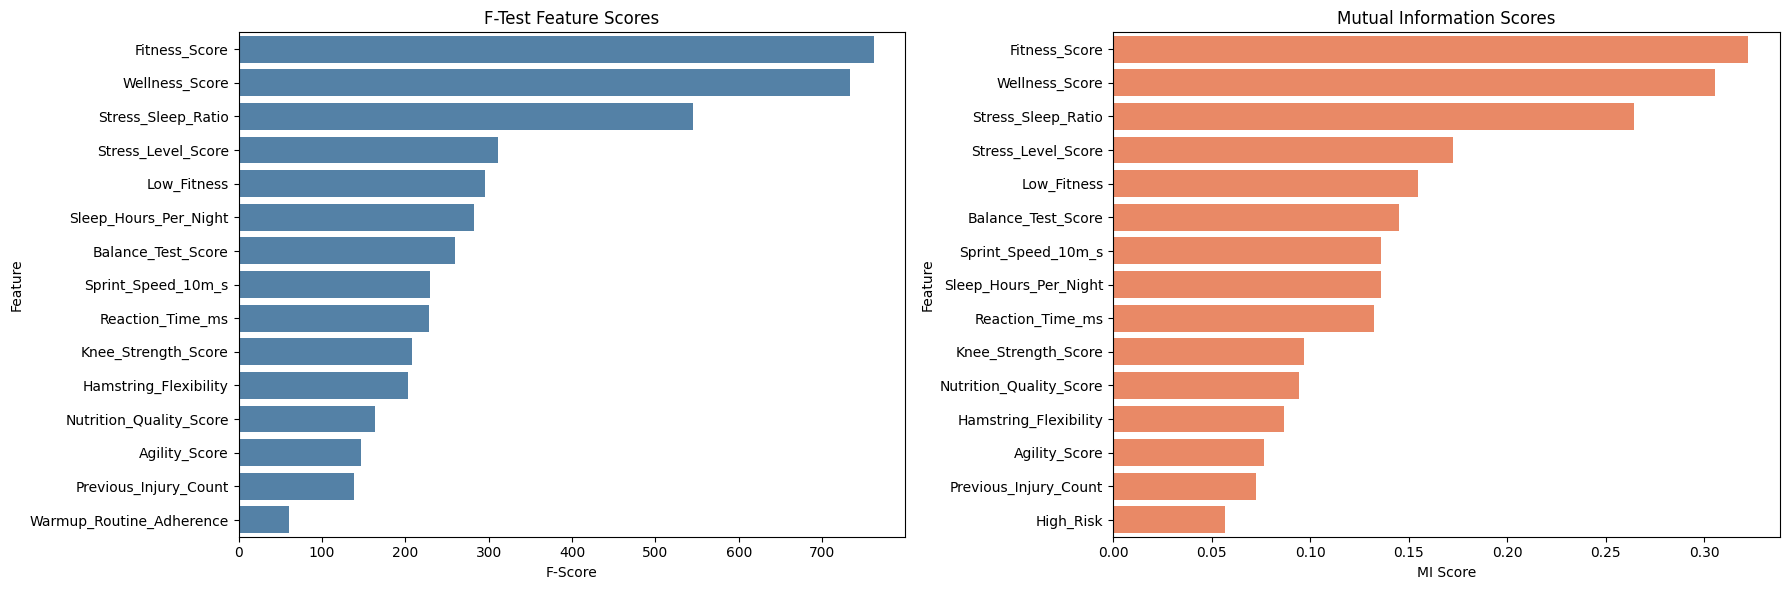

In [34]:
# Prepare the data for feature importance:
X = df_scaled.drop(columns=['Injury_Next_Season'])
y = df_scaled['Injury_Next_Season']
all_features = X.columns.tolist()

# Perform the F-Test (ANOVA):
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X, y)
f_scores = pd.DataFrame({
    'Feature': all_features,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)

# Capture the Mutual Information:
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X, y)
mi_scores = pd.DataFrame({
    'Feature': all_features,
    'MI_Score': selector_mi.scores_
}).sort_values('MI_Score', ascending=False)

# Combine the rankings:
f_scores['Rank_F'] = f_scores['F_Score'].rank(ascending=False)
mi_scores['Rank_MI'] = mi_scores['MI_Score'].rank(ascending=False)
combined = f_scores[['Feature', 'Rank_F']].merge(
    mi_scores[['Feature', 'Rank_MI']], on='Feature'
)
combined['Avg_Rank'] = (combined['Rank_F'] + combined['Rank_MI']) / 2
top_k = len(all_features)
top_combined = combined.sort_values('Avg_Rank').head(top_k)

# Visualize the top features:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=f_scores.head(15), x='F_Score', y='Feature', ax=ax1, color='steelblue')
ax1.set_title('F-Test Feature Scores')
ax1.set_xlabel('F-Score')

sns.barplot(data=mi_scores.head(15), x='MI_Score', y='Feature', ax=ax2, color='coral')
ax2.set_title('Mutual Information Scores')
ax2.set_xlabel('MI Score')

plt.tight_layout()
plt.show()

In [35]:
# Output the top features:
print(f"Top Features by Combined Rank:")
print(top_combined[['Feature', 'Avg_Rank']])

Top Features by Combined Rank:
                       Feature  Avg_Rank
0                Fitness_Score      1.00
1               Wellness_Score      2.00
2           Stress_Sleep_Ratio      3.00
3           Stress_Level_Score      4.00
4                  Low_Fitness      5.00
6           Balance_Test_Score      6.50
5        Sleep_Hours_Per_Night      7.00
7           Sprint_Speed_10m_s      7.50
8             Reaction_Time_ms      9.00
9          Knee_Strength_Score     10.00
10       Hamstring_Flexibility     11.50
11     Nutrition_Quality_Score     11.50
12               Agility_Score     13.00
13       Previous_Injury_Count     14.00
15                   High_Risk     15.50
14    Warmup_Routine_Adherence     16.00
16     Workload_Recovery_Ratio     19.00
19               Age_Group_U22     19.50
22              Age_x_Training     20.50
24          BMI_Category_Obese     20.50
18            Position_Forward     21.00
17                   Height_cm     21.50
23         Position_Goalke

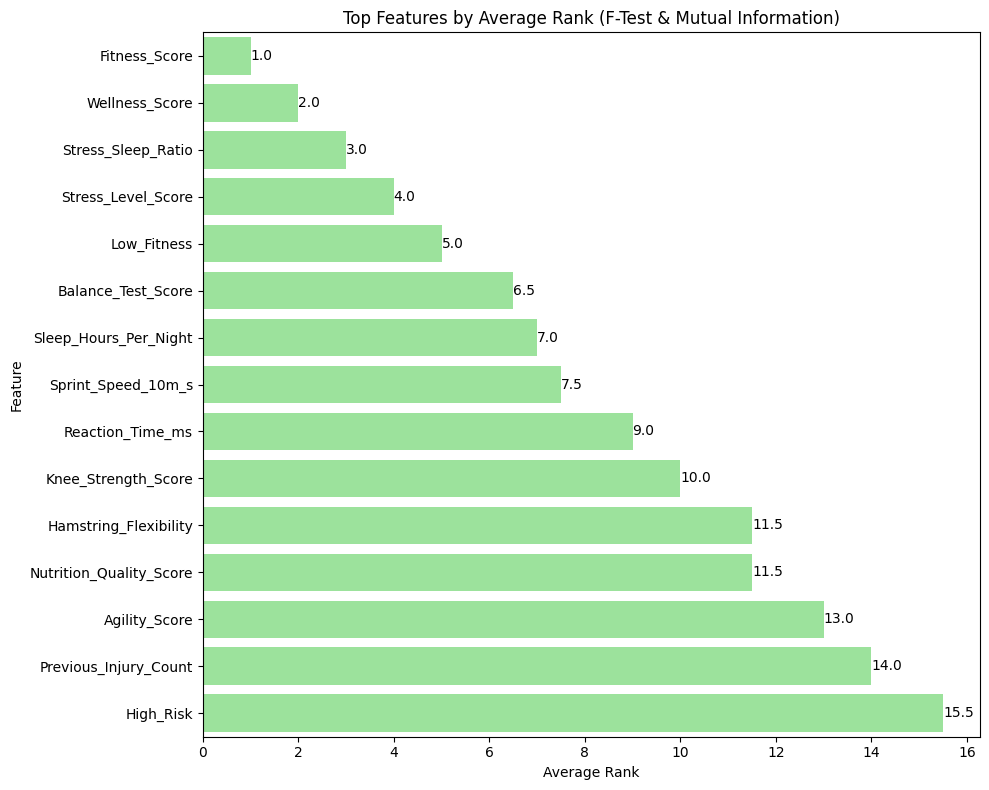

In [36]:
# Create a bar chart of the top features based on the average rank:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_combined.head(15), x='Avg_Rank', y='Feature', color='lightgreen')
plt.title('Top Features by Average Rank (F-Test & Mutual Information)')
plt.xlabel('Average Rank')
plt.ylabel('Feature')
plt.tight_layout()
for index, value in enumerate(top_combined['Avg_Rank'].head(15)):
    plt.text(value, index, f'{value:.1f}', va='center', ha='left', fontsize=10)
plt.show()

#### Summary of Feature Importance Tests

This ranking combines F-Test and Mutual Information scores to identify the most informative features for predicting `Injury_Next_Season`.

##### Top Predictive Features
These features consistently ranked highest across both statistical methods:

- **Fitness_Score (Rank 1)**: The strongest overall predictor. High fitness levels likely correlate with reduced injury risk.
- **Wellness_Score (Rank 2)**: Captures holistic health — sleep, recovery, and stress — making it a powerful indicator.
- **Stress_Sleep_Ratio (Rank 3)** & **Stress_Level_Score (Rank 4)**: Stress-related metrics dominate the top ranks, reinforcing the importance of mental and physical recovery balance.
- **Low_Fitness (Rank 5)**: A binary flag that complements Fitness_Score, confirming that low fitness is a clear risk factor.

##### Strong Physical and Performance Metrics
These features reflect athletic ability and physical readiness:

- **Balance_Test_Score (Rank 6.5)**  
- **Sprint_Speed_10m_s (Rank 7.5)**  
- **Reaction_Time_ms (Rank 9)**  
- **Knee_Strength_Score (Rank 10)**  
- **Hamstring_Flexibility (Rank 11.5)**  
- **Agility_Score (Rank 13)**  

These metrics suggest that neuromuscular control and explosive performance are closely linked to injury outcomes.

##### Lifestyle and Recovery Indicators
- **Sleep_Hours_Per_Night (Rank 7)**
- **Nutrition_Quality_Score (Rank 11.5)**  
- **Workload_Recovery_Ratio (Rank 19)**  
- **Warmup_Routine_Adherence (Rank 15)**  

These features emphasize the role of recovery, preparation, and lifestyle in injury prevention.

##### Injury History and Risk Flags
- **Previous_Injury_Count (Rank 14)**: Past injuries remain a strong predictor.
- **High_Risk (Rank 22.25)**: This engineered flag still holds value, though it's slightly lower ranked, possibly due to overlap with other features.

##### Demographics and Categorical Features
- **Height_cm (Rank 18)**  
- **Age_Group_U22 (Rank 20)**  
- **Position_Forward (Rank 20.5)**  
- **Age_x_Training (Rank 21)**  
- **Position_Goalkeeper (Rank 23.5)**  
- **BMI (Rank 24.75)**  

These features are less predictive on their own but may interact meaningfully with others.

##### Lower-Ranked Features
Features like `Training_Intensity`, `BMI_Category_*`, and `Position_Midfielder` ranked lowest. These may be redundant with stronger predictors, less informative in isolation, or worth dropping or combining in future modeling.

## Final Feature Selection

After a comprehensive analysis combining:

- **Injury Pattern Analysis** (statistical tests across injured vs. non-injured groups)
- **Correlation Analysis** (strength of association with `Injury_Next_Season`)
- **Feature Importance Ranking** (F-Test and Mutual Information)
- **Redundancy Checks** (removing highly correlated or overlapping features)

The following features were selected as the best predictors of injury risk:

### Selected Features

| Feature                    | Reasoning                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| `Stress_Level_Score`       | Strong correlation (+0.53), top-ranked, statistically significant         |
| `Sleep_Hours_Per_Night`    | Strong negative correlation (–0.51), top-ranked, significant              |
| `Wellness_Score`           | Top-ranked, captures multiple recovery dimensions                         |
| `Sprint_Speed_10m_s`       | Strong negative correlation, top-ranked, significant                      |
| `Reaction_Time_ms`         | Strong positive correlation, top-ranked, significant                      |
| `Knee_Strength_Score`      | Strong negative correlation, top-ranked, significant                      |
| `Hamstring_Flexibility`    | Strong negative correlation, top-ranked, significant                      |
| `Balance_Test_Score`       | Strong negative correlation, top-ranked, significant                      |
| `Agility_Score`            | Strong negative correlation, top-ranked, significant                      |
| `Nutrition_Quality_Score`  | Strong negative correlation, top-ranked, significant                      |
| `Previous_Injury_Count`    | Statistically significant, moderately correlated                          |
| `Low_Fitness`              | Engineered feature, highly ranked                                         |
| `Fitness_Score`            | Top-ranked, likely aggregates multiple physical metrics                   |
| `Stress_Sleep_Ratio`       | Top-ranked, captures interaction between stress and recovery              |
| `Warmup_Routine_Adherence` | Statistically significant (Chi-square), moderately correlated             |

### Excluded Features

These features were excluded due to low importance, redundancy, or lack of statistical significance:

- `BMI`, `Weight_kg`, `Height_cm` = not significant; BMI & Weight are highly correlated  
- `Age`, `Age_x_Training`, `Age_Group_U22/U25` = not significant  
- `Position_*` = no significant association with injury  
- `Training_Hours_Per_Week`, `Matches_Played_Past_Season`, `Training_Intensity` = not significant  
- `BMI_Category_*` = derived from BMI, which was not significant
- `High_Risk` = not as important as other engineered features

## Dataset Preparation & Exporting

In [37]:
# Define the selected features:
selected_features = [
    'Stress_Level_Score',
    'Sleep_Hours_Per_Night',
    'Wellness_Score',
    'Sprint_Speed_10m_s',
    'Reaction_Time_ms',
    'Knee_Strength_Score',
    'Hamstring_Flexibility',
    'Balance_Test_Score',
    'Agility_Score',
    'Nutrition_Quality_Score',
    'Previous_Injury_Count',
    'Low_Fitness',
    'Fitness_Score',
    'Stress_Sleep_Ratio',
    'Warmup_Routine_Adherence'
]

# Add the target variable:
selected_features.append('Injury_Next_Season')

# Create the dataset to be used in modeling:
df_modeling = df_scaled[selected_features].copy()

# Sort columns with target at front and alphabetical order:
df_modeling = df_modeling.reindex(sorted(df_modeling.columns), axis=1)
df_modeling = df_modeling[['Injury_Next_Season'] + [col for col in df_modeling.columns if col != 'Injury_Next_Season']]

# Preview the final dataset:
print("Final Modeling Dataset:")
display(df_modeling.head())

Final Modeling Dataset:


,Injury_Next_Season,Agility_Score,Balance_Test_Score,Fitness_Score,Hamstring_Flexibility,Knee_Strength_Score,Low_Fitness,Nutrition_Quality_Score,Previous_Injury_Count,Reaction_Time_ms,Sleep_Hours_Per_Night,Sprint_Speed_10m_s,Stress_Level_Score,Stress_Sleep_Ratio,Warmup_Routine_Adherence,Wellness_Score
0,0,-0.087649,1.069297,0.491996,-0.005236,0.379259,0,0.760997,-0.411816,1.560205,1.037465,-0.227881,-0.650428,-0.899441,1,1.127931
1,0,1.843613,0.500648,1.111952,0.502136,-0.346362,0,0.716401,0.475002,0.050595,1.979228,-0.468019,-0.409281,-0.982990,1,1.340729
2,1,-0.939707,-0.058566,-0.519264,-0.475015,0.319748,0,-1.020030,0.475002,0.876025,-0.237389,-0.667398,-0.955724,-0.741810,0,-0.023700
3,0,0.586842,0.543868,0.619538,-0.780880,1.183688,0,1.657432,-0.411816,-1.026915,0.333441,0.831162,-0.219940,-0.361847,1,1.022099
4,1,0.996011,-0.104356,0.394975,-0.369953,0.275898,0,-0.301841,0.475002,-0.909176,-0.870460,-1.725425,-0.145343,0.189340,0,-0.399246


In [38]:
# Export the dataset to a CSV:
df_modeling.to_csv('data_prepped.csv', index=False)
print("Dataset exported as 'data_prepped.csv'")

Dataset exported as 'data_prepped.csv'
